In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

#split data
from sklearn.model_selection import train_test_split

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm  

In [3]:
housing = pd.DataFrame(pd.read_csv("Housing_data_final(10).csv"))
housing2 = pd.DataFrame(pd.read_csv("Housing_data_final(11).csv"))

In [4]:
# Check the head of the dataset
housing.head()

,price,area,bedrooms,bathrooms,washingmachine,dtcenter,kitchen,ac,balcony,parking,furnish
0,1645136.35,9.9,1,1,0,3.783407,0,0,1,0,0
1,1646078.72,12.4,2,1,0,8.297627,0,1,1,0,0
2,1658431.06,14.9,1,1,0,3.601562,0,1,0,1,0
3,1694781.66,22.3,1,1,0,7.930386,1,1,0,0,0
4,1700025.47,11.2,1,1,0,3.443001,0,0,1,0,0


In [5]:
housing.shape

(1635, 11)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           1635 non-null   float64
 1   area            1635 non-null   float64
 2   bedrooms        1635 non-null   int64  
 3   bathrooms       1635 non-null   int64  
 4   washingmachine  1635 non-null   int64  
 5   dtcenter        1635 non-null   float64
 6   kitchen         1635 non-null   int64  
 7   ac              1635 non-null   int64  
 8   balcony         1635 non-null   int64  
 9   parking         1635 non-null   int64  
 10  furnish         1635 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 140.6 KB


In [7]:
# outlier treatment for area
#Q1 = housing.area.quantile(0.25)
#Q3 = housing.area.quantile(0.75)
#IQR = Q3 - Q1
#housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

In [8]:
# outlier treatment for price
#Q1 = housing.price.quantile(0.25)
#Q3 = housing.price.quantile(0.75)
#IQR = Q3 - Q1
#housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

In [9]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train2, df_test2 = train_test_split(housing, train_size = 0.1, test_size = 0.9, random_state = 100)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'washingmachine', 'dtcenter', 'kitchen', 'ac', 'balcony', 'parking', 'furnish']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [12]:
y_train = df_train.pop('price')
X_train = df_train

In [13]:
lm = LinearRegression()
lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)

-0.2061902985091416
[ 0.57089856  0.04401489  0.19394326  0.04679482 -0.11890669  0.04266996
  0.06324524  0.09926079  0.07518975  0.02517091]


In [14]:
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model

In [15]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2, include_bias=True)
xp = polynomial_features.fit_transform(X_train)
xp.shape

model_2 = sm.OLS(y_train, xp).fit()

print(model_2.params)

const   -1.675016e-01
x1       6.670069e-01
x2       2.435692e-01
x3      -2.095218e-01
x4      -1.145120e+07
             ...     
x61      1.413605e-02
x62      2.378884e-02
x63     -6.228275e-02
x64     -3.084529e-03
x65      1.534801e-03
Length: 66, dtype: float64


In [16]:
#Let's see the summary of our linear model\
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              984.0
Date:                Wed, 06 Dec 2023   Prob (F-statistic):                        0.00
Time:                        20:31:50   Log-Likelihood:                          1047.2
No. Observations:                1144   AIC:                                     -2074.
Df Residuals:                    1134   BIC:                                     -2024.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,kitchen,7.86
2,bathrooms,7.68
6,ac,6.92
7,balcony,5.27
0,area,3.96
8,parking,3.94
3,washingmachine,2.76
9,furnish,2.71
4,dtcenter,2.06
1,bedrooms,1.38


In [18]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     77.60
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:31:51   Log-Likelihood:                 1420.3
No. Observations:                1144   AIC:                            -2715.
Df Residuals:                    1081   BIC:                            -2397.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1675      0.064     -2.603      0.0

In [19]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'washingmachine', 'dtcenter', 'kitchen', 'ac', 'furnish', 'balcony', 'parking', 'furnish']

In [21]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test2[num_vars] = scaler.fit_transform(df_test2[num_vars])

In [22]:
y_test = df_test.pop('price')
X_test = df_test
y_test2 = df_test2.pop('price')
X_test2 = df_test2

In [23]:
# Adding constant variable to test dataframe
#X_test = sm.add_constant(X_test)
print(y_test)

585     0.158848
629     0.165170
1216    0.306443
258     0.104589
143     0.062420
          ...   
533     0.150427
687     0.171654
1111    0.266201
568     0.156049
374     0.123753
Name: price, Length: 491, dtype: float64


In [24]:
xtt = polynomial_features.fit_transform(X_test)
y_pred_2 = model_2.predict(xtt) 

In [25]:
# Making predictions
y_pred = lm.predict(X_test)
y_pred2 = lm.predict(X_test2)

In [26]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.6071554648650068

In [27]:
r2_score(y_test2, y_pred2)

0.635485555333695

In [28]:
r2_score(y_test,y_pred_2)

0.762972665714003

In [37]:
from sklearn.metrics import mean_squared_error
score = (mean_squared_error(y_test2, y_pred2))
print(score)

0.009009338190873762


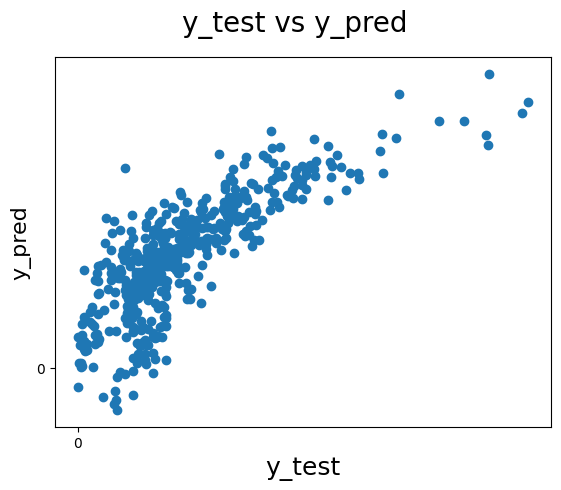

In [199]:
# Assuming y_test and y_pred are arrays of actual and predicted prices, respectively

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)  # Plot heading
plt.xlabel('y_test', fontsize=18)  # X-label
plt.ylabel('y_pred', fontsize=16)  # Y-label

# Set y-axis ticks and labels to represent actual price values
plt.yticks(np.arange(min(y_test), max(y_test)+1, 1000))
plt.xticks(np.arange(min(y_test), max(y_test)+1, 1000))

plt.show()


Text(0, 0.5, 'Giá thực tế')

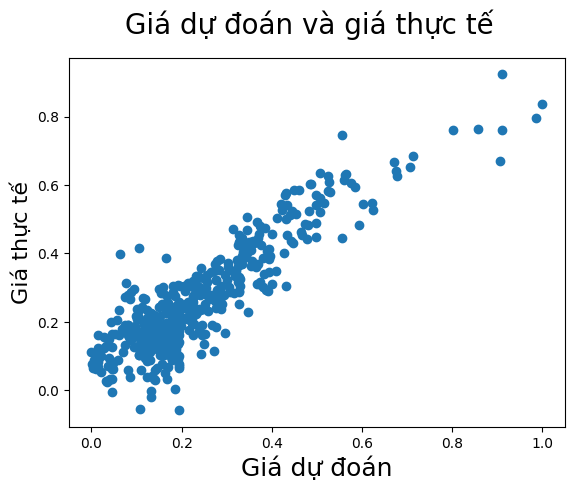

In [160]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_2)
fig.suptitle('Giá dự đoán và giá thực tế', fontsize=20)              # Plot heading 
plt.xlabel('Giá dự đoán', fontsize=18)                          # X-label
plt.ylabel('Giá thực tế', fontsize=16)                          # Y-label

Text(0, 0.5, 'y_pred')

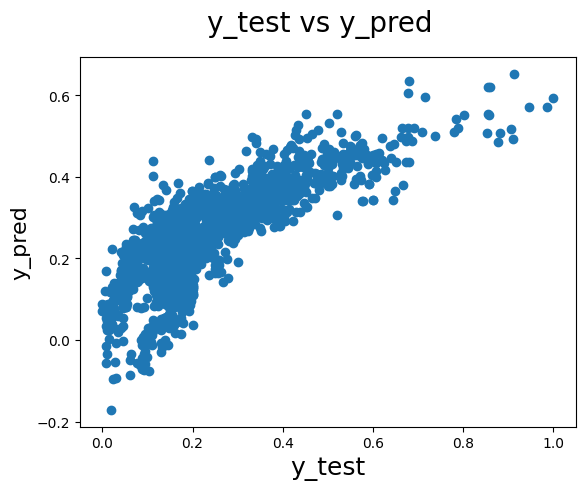

In [158]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test2,y_pred2)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label